# Mini-projet digue

#### Devambez Margot Mono 1A

## Travail à la maison

1.  Bilan des forces appliquées à la digue en 2D : 
    - force gravitationnelle orientée vers le bas (poids du bloc de béton)
    - force normale exercée par le sol rocheux vers le haut
    - force de pression exercée par la masse d'eau sur le côté de la digue
    - force de friction statique entre le béton et la roche horizontalement
    
La force normale exercée par le sol rocheux sur la digue, opposée à la gravité permet à la digue de ne pas glisser.

2.  Pression hydrostatique dans l'eau : 

$P_(eau)$(x)=$ρ$*$g$*$z$

Avec $ρ$ la masse volumique de l'eau, $g$ l'accélération dûe à la gravité et $z$ la hauteur par rapport au sol

3.  Equations d'équilibre statique :
    - Equilibre vertical $ΣF_y$=$N$ - $P_(eau)$ - $P_b$ = 0 
    avec $N$ la force normale exercée par le sol, $P_(eau)$ la force de pression due à la hauteur d'eau et $P_b$ le poids du bloc de béton
    - Equilibre horizontal $ΣF_x$=$F_(friction)$=0
    avec $F_(friction)$ la force de friction statique entre le béton et le sol rocheux

## Modélisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.integrate as si

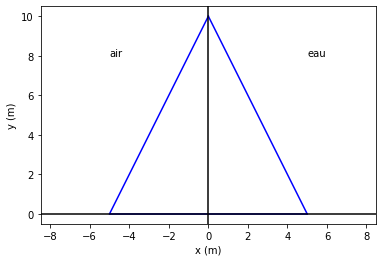

In [2]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xa = -5
xe = +5


# On définit les fonctions côté eau et côté air, ici les courbes concaves
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return  -(y - H) * xe / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(fair(y), y, '-b') 
plt.plot(feau(y), y, '-b')  
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

## Travail en séance

### Cas des digues en pentes droites

a) On veut calculer le volume de la digue par intégration de la largeur de la digue en fonction de y.
Pour cela, on définit d'abord une fonction qui calcule la largeur de la digue, puis on l'intègre grâce à la fonction quad du module scipy.integrate.

In [3]:
# Calcul de la largeur de la digue
def largeur(y):
    return L*(feau(y)-fair(y))
L = 1

# Calcul du volume de la digue par intégration de la largeur
volume_int,erreur = si.quad(largeur,0,H)

On effectue maintenant le calcul analytique du volume avec l'aire du triangle ((base*hauteur)/2) multipliée par la longueur L=1m

In [4]:
volume_analytique = (((xe-xa)*H)/2)*1

In [5]:
print('volume de la digue par intégration :', volume_int, 'm3')
print('volume de la digue par calcul analytique :', volume_analytique, 'm3')

volume de la digue par intégration : 50.0 m3
volume de la digue par calcul analytique : 50.0 m3


La force de gravité exercée sur la digue est le poids, on a donc $P$=$m$*$g$
<br> On sait que $m$=$ρ$*$V$ avec $ρ$ la masse volumique de la digue et $V$ le volume de la digue.
On a donc : $P$=$ρ$*$V$*$g$

In [6]:
g = 9.81 #m/s2
p_digue = 3000 #kg/m3

# Calcul de la force de gravité
poids = p_digue*volume_int*g

print('force de gravité exercée sur la digue :', poids, 'N')

force de gravité exercée sur la digue : 1471500.0 N


b) On veut maintenant calculer la résultante des forces de pression côté eau.

In [7]:
peau = 1000 #kg/m3
g = 9.81 #m/s2
H = 10

# Définition des fonctions de densité de force

# Selon x 
def df_x(y):
    return -peau*g*(H-y)
f_x,err = si.quad(df_x, 0, H)  # Calcul de l'intégrale

print('force en x :', f_x, 'N')

# Selon y 
def df_y(y):
    return peau*g*(H-y)*xa/H
f_y,err = si.quad(df_y, 0, H)  # Calcul de l'intégrale

print('force en y :', f_y, 'N')

# Calcul de la résultante des forces de pression 
resultante = np.sqrt(f_x**2+f_y**2)

print('resultante des forces :', resultante, 'N')

force en x : -490500.0 N
force en y : -245250.0 N
resultante des forces : 548395.6714818234 N


c) On veut maintenant calculer avec le principe fondamental de la dynamique les deux composantes (normale et tangentielle) de la force de réaction du sol, puis le rapport de ces composante
D'après le PFD, $ΣF$=$0$
<br> On a donc $P$+$Fg$+$R$=$0$
<br> <=>  $P$+$Fg$+$T$+$N$=$0$


In [8]:
N = -f_y-poids
T = -f_x
print('composante normale de la force de réaction du sol', N, 'N')
print('composante tangentielle de la force de réaction du sol', T, 'N')
print('T/N', T/N)

composante normale de la force de réaction du sol -1226250.0 N
composante tangentielle de la force de réaction du sol 490500.0 N
T/N -0.4


Le rapport T/N est inférieur au coefficient de frottement, la digue est donc stable.

### Cas des digues convexes

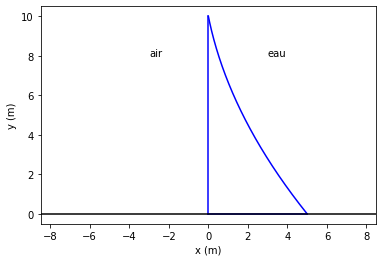

In [9]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xe = 5
xa = 0

# On définit les fonctions côté eau et côté air, ici les courbes concaves
a = 3
def feau(y):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
def fair(y):
    return (H - y) * xa / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(feau(y), y, '-b')
plt.plot(fair(y), y, '-b')
plt.plot([xe, xa], [0, 0], '-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3, 8, 'eau')
plt.text(-3, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
#plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

e) On veut calculer , pour a=3, xa=0 et xe=5 la résultante des forces de pression, le volume de béton, et le rapport dans l’hypothèse de l’équilibre statique.

In [10]:
a = 3
xa = 0
xe = 5

def dforce_x(y):
    return peau*g*(H-y)*(-1)
f_x,err1 = quad(dforce_x,0,H)

def dforce_y(y):
    return peau*g*(H-y)*(((2*a*y)/H**2)-((a+xe)/H))
f_y,err = quad(dforce_y, 0, H)

print('force en x :', f_x, 'N')
print('force en y :', f_y, 'N')

module = np.sqrt(f_x**2+f_y**2)
print('module force :', module, 'N')

force en x : -490500.0 N
force en y : -294300.00000000006 N
module force : 572016.380884324 N
